# Logistic Regression Assignment

1. Title of Database: Abalone data
2. Sources:
   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)
   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia
   (c) Date received: December 1995
3. Number of Instances: 4177
4. Number of Attributes: 8
5. Attribute information:
   Given is the attribute name, attribute type, the measurement unit and a
   brief description
	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years
6. From the  above description of the dataset predict the Sex of abalone using Logistic Regression Classifier and make notebook.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline  

In [2]:
aba=pd.read_csv("abalone.csv")
aba

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


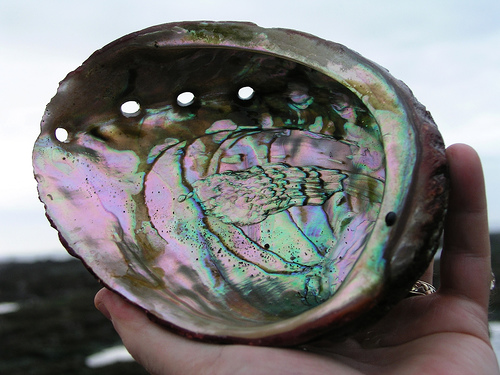

In [3]:
from IPython.display import Image
url = 'https://www.elementseafood.com/wp-content/uploads/2012/01/abalone.jpg'
Image(url,width=300, height=300)

In [50]:
print(aba.isnull().sum())
### No Null Values
aba.Sex.value_counts()

Sex                0
Length             0
Diameter           0
Height             0
Whole weight       0
Shucked weight     0
Viscera weight     0
Shell weight       0
Rings              0
dtype: int64


M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [5]:
aba.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [51]:
aba = aba.sample(aba.shape[0])
print(aba.shape)
aba

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3293,M,0.575,0.455,0.185,1.1560,0.5525,0.2430,0.2950,13
2183,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.3500,6
949,M,0.480,0.375,0.115,0.6765,0.3205,0.1065,0.1700,6
372,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.6000,19
1861,M,0.515,0.385,0.110,0.5785,0.2530,0.1600,0.1400,8
...,...,...,...,...,...,...,...,...,...
1832,I,0.390,0.310,0.105,0.2665,0.1185,0.0525,0.0810,8
1898,F,0.570,0.440,0.120,0.8030,0.3820,0.1525,0.2340,9
1731,F,0.665,0.505,0.160,1.2915,0.6310,0.2925,0.3200,11
2118,F,0.480,0.380,0.120,0.6080,0.2705,0.1405,0.1850,8


In [69]:
df_input=aba[['Length  ','Diameter','Height ','Whole weight   ','Shucked weight','Viscera weight ','Shell weight   ','Rings']]
#df_input=aba[['Height ','Whole weight   ','Shucked weight','Viscera weight ','Shell weight   ','Rings']]
df_output=aba['Sex']
feature_cols=['Length  ','Diameter','Height ','Whole weight   ','Shucked weight','Viscera weight ','Shell weight   ','Rings']

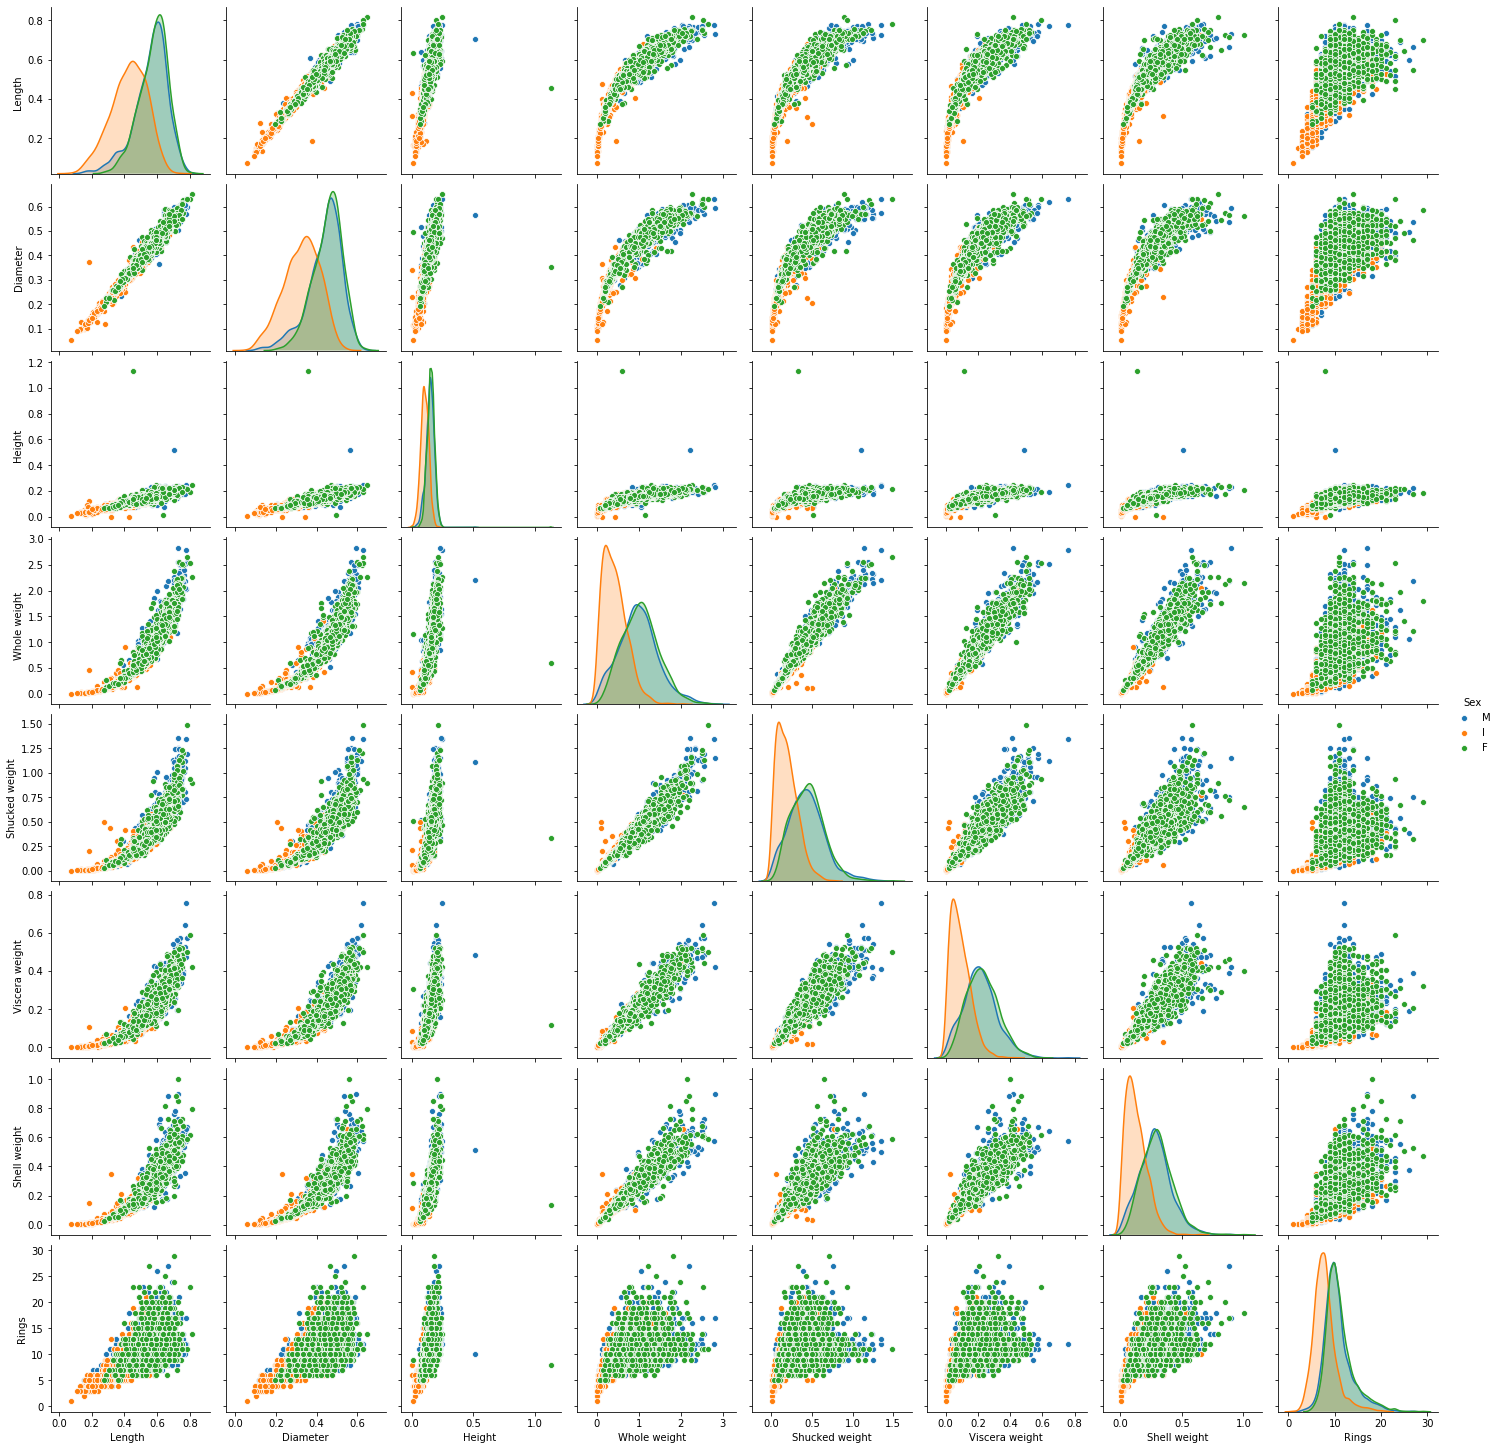

In [8]:
sns.pairplot(aba,hue='Sex')

                 Length    Diameter   Height   Whole weight     \
Length           1.000000  0.986812  0.827554         0.925261   
Diameter         0.986812  1.000000  0.833684         0.925452   
Height           0.827554  0.833684  1.000000         0.819221   
Whole weight     0.925261  0.925452  0.819221         1.000000   
Shucked weight   0.897914  0.893162  0.774972         0.969405   
Viscera weight   0.903018  0.899724  0.798319         0.966375   
Shell weight     0.897706  0.905330  0.817338         0.955355   
Rings            0.556720  0.574660  0.557467         0.540390   

                 Shucked weight  Viscera weight   Shell weight        Rings  
Length                 0.897914         0.903018         0.897706  0.556720  
Diameter               0.893162         0.899724         0.905330  0.574660  
Height                 0.774972         0.798319         0.817338  0.557467  
Whole weight           0.969405         0.966375         0.955355  0.540390  
Shucked weight 

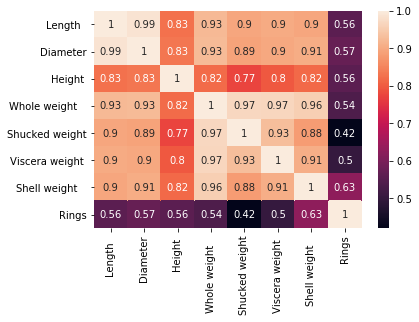

In [28]:
c=aba.corr()
sns.heatmap(c,annot=True)
print(c)

In [106]:
df_input1=df_input.copy()
df_input1.drop('Whole weight   ',inplace=True,axis=1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_input1, df_output, test_size=0.3, random_state=101)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2923, 6) (2923,)
(1254, 6) (1254,)


pandas.core.series.Series

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 1003 to 3879
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Length           2923 non-null   float64
 1   Diameter         2923 non-null   float64
 2   Height           2923 non-null   float64
 3   Shucked weight   2923 non-null   float64
 4   Viscera weight   2923 non-null   float64
 5   Shell weight     2923 non-null   float64
dtypes: float64(6)
memory usage: 159.9 KB


In [109]:
aba.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [114]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=300).fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(logreg.intercept_)
print(list(zip(feature_cols,logreg.coef_)))
#len(logreg.coef_) ==> Doubts . 

[-1.90071211  1.75645979  0.14425232]
[('Length  ', array([ 0.67456657,  1.51505413,  1.37808285, -0.21452467,  2.59216602,
        1.73883248])), ('Diameter', array([ 0.85769192, -0.70644332, -1.28081583, -1.62316393, -3.9019969 ,
       -3.42764257])), ('Height ', array([-1.53225849, -0.80861081, -0.09726702,  1.8376886 ,  1.30983088,
        1.68881009]))]


In [115]:
y_train.value_counts()
#type(y_train)

M    1057
I     934
F     932
Name: Sex, dtype: int64

In [116]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.5669856459330144


In [82]:
#########Checking NUll Accuracy #########################
print(y_test.value_counts())
print(len(y_test))
#y_test.value_counts.head(1)/len(y_test)
471/1254

M    471
I    408
F    375
Name: Sex, dtype: int64
1254


0.37559808612440193

In [83]:
### COnfusion Metrinc
conf=metrics.confusion_matrix(y_test, y_pred)
print(conf)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

[[218  75  82]
 [ 36 347  25]
 [223 111 137]]
              precision    recall  f1-score   support

           F       0.46      0.58      0.51       375
           I       0.65      0.85      0.74       408
           M       0.56      0.29      0.38       471

    accuracy                           0.56      1254
   macro avg       0.56      0.57      0.54      1254
weighted avg       0.56      0.56      0.54      1254



In [84]:
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Test Accuracy:  0.5598086124401914


In [96]:
df_input=aba[['Length  ','Diameter','Height ','Whole weight   ','Shucked weight','Viscera weight ','Shell weight   ']]
#df_input=aba[['Length  ','Diameter','Height ','Whole weight   ','Shucked weight','Viscera weight ','Shell weight   ','Rings']]
df_output=aba['Sex']
feature_cols=['Length  ','Diameter','Height ','Whole weight   ','Shucked weight','Viscera weight ','Shell weight   ']
X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.3, random_state=101)
logreg=LogisticRegression(max_iter=200).fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.5717703349282297


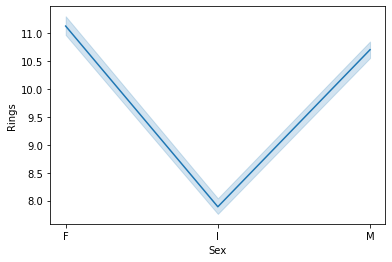

In [98]:
#Now Lets rung the Same after standardisation 
aba.columns
### No Correlation between Sex and Rings
aba[['Sex','Rings']]
sns.lineplot(x='Sex',y='Rings',data=aba)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_input)
# Scale and center the data
fdf_normalized = scaler.transform(df_input)
fdf_normalized = pd.DataFrame(data=fdf_normalized, index=df_input.index, columns=df_input.columns)
print(fdf_normalized)


      Length    Diameter   Height   Whole weight     Shucked weight  \
3293  0.424788  0.474853  1.087551         0.667423        0.870216   
2183 -0.241443 -0.079426  0.370226        -0.041283       -0.562627   
949  -0.366361 -0.331371 -0.586208        -0.310489       -0.175129   
372   1.299216  1.734579  1.446213         1.954311        1.016654   
1861 -0.074885 -0.230593 -0.705762        -0.510354       -0.479270   
...        ...       ...       ...              ...             ...   
1832 -1.115871 -0.986428 -0.825316        -1.146660       -1.085300   
1898  0.383148  0.323686 -0.466653        -0.052500        0.101977   
1731  1.174297  0.978743  0.489780         0.943768        1.223921   
2118 -0.366361 -0.280982 -0.466653        -0.450191       -0.400419   
4167 -0.199803 -0.280982 -0.347099        -0.513413       -0.407177   

      Viscera weight   Shell weight     
3293         0.569396         0.403555  
2183        -0.593914         0.798709  
949         -0.676030   

In [100]:
X_train, X_test, y_train, y_test = train_test_split(fdf_normalized,df_output,random_state=1234,test_size=0.3)
logreg = LogisticRegression(class_weight='balanced')                            # Set Large C value for low regularization to prevent overfitting
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
########Testing the Evalaution
# now applying our learnt model on test and also on train data
y_pred_test_prob=logreg.predict(X_test)
y_pred_test =  logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)
print("Test Accuracy: ",  metrics.accuracy_score(y_test, y_pred_test))
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

Test Accuracy:  0.5406698564593302
Train Accuracy:  0.5549093397194663


In [103]:
#########Checking NUll Accuracy #########################
print(y_test.value_counts())
print(len(y_test))
#y_test.value_counts.head(1)/len(y_test)
440/1254

M    433
F    423
I    398
Name: Sex, dtype: int64
1254


0.3508771929824561

In [44]:
### COnfusion Metrinc
conf=metrics.confusion_matrix(y_test, y_pred)
print(conf)
cr = metrics.classification_report(y_test, y_pred)
print(cr)

[[ 63 156 182]
 [ 72 179 162]
 [ 77 175 188]]
              precision    recall  f1-score   support

           F       0.30      0.16      0.21       401
           I       0.35      0.43      0.39       413
           M       0.35      0.43      0.39       440

    accuracy                           0.34      1254
   macro avg       0.33      0.34      0.33      1254
weighted avg       0.33      0.34      0.33      1254



In [46]:
### ROC Curve


#Thanks for completing !!
Notebook created by: <a href = "https://www.linkedin.com/in/narendrasharma/">Narendra Sharma</a>

<hr>